<a href="https://colab.research.google.com/github/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Kuis_1_Machine_Learning_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link Github:
(https://github.com/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Kuis_1_Machine_Learning_FIX.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Kode ini mengimport beberapa library seperti NumPy untuk komputasi numerik, Matplotlib untuk visualisasi data, dan modul-modul dari pustaka Scikit-learn.

# Ini menggunakan dataset dari Scikit-learn dan membaginya menjadi data latih dan data uji menggunakan train_test_split().

# Selanjutnya, kode ini melakukan klasifikasi data menggunakan dua model: Gaussian Naive Bayes dan Support Vector Machine (SVM).

# Terakhir, kode menghitung akurasi prediksi menggunakan accuracy_score() dan memberikan laporan klasifikasi menggunakan classification_report().

In [2]:
import tensorflow as tf

# Load MNIST dataset
data_mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data_mnist.load_data()

# Check data distribution
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} data points")

# Pertama, kode ini memuat dataset MNIST, yang berisi gambar angka tulisan tangan dari 0 hingga 9.

# Selanjutnya, kode membagi dataset ini menjadi data latih (X_train, y_train) dan data uji (X_test, y_test).

# Setelah itu, kode ini menghitung distribusi data, yaitu jumlah gambar untuk setiap label (angka dari 0 hingga 9)
# dalam data latih. Ini membantu kita memahami seberapa banyak gambar yang kita miliki untuk setiap angka.

11490434/11490434 [==============================] - 0s 0us/step
Label 0: 5923 data points
Label 1: 6742 data points
Label 2: 5958 data points
Label 3: 6131 data points
Label 4: 5842 data points
Label 5: 5421 data points
Label 6: 5918 data points
Label 7: 6265 data points
Label 8: 5851 data points
Label 9: 5949 data points


# **Detail Kuis**

## 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

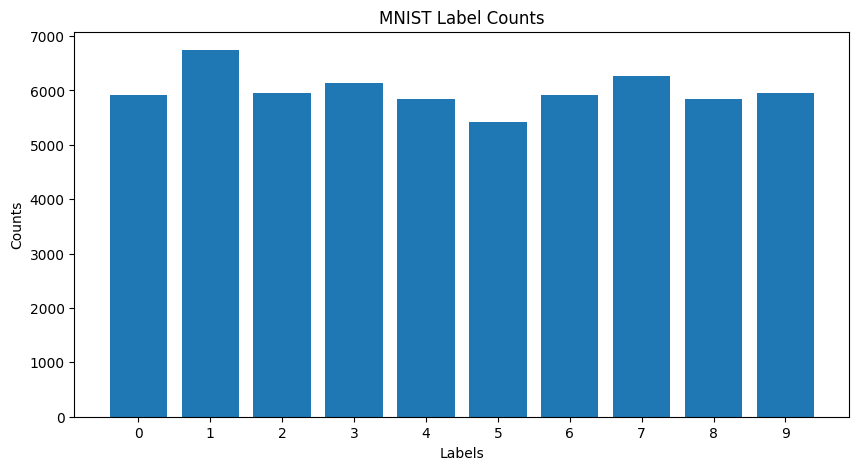

In [3]:
# Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

# plt.figure(figsize=(10, 5)) mengatur ukuran figur (gambar) yang akan digambar.

# plt.bar(range(10), label_counts) membuat diagram batang dengan sumbu x dari 0 hingga 9 (angka dari 0 hingga 9) dan tinggi setiap batang sesuai dengan jumlah gambar yang dimiliki setiap angka.

# plt.xticks(range(10), [str(i) for i in range(10)]) mengatur label sumbu x agar sesuai dengan angka 0 hingga 9.

# plt.xlabel('Labels') dan plt.ylabel('Counts') memberi label pada sumbu x dan y masing-masing.

# plt.title('MNIST Label Counts') memberi judul untuk diagram.

# plt.show() menampilkan diagram batang yang sudah dibuat.

In [4]:
def is_imbalance_significant(imbalance_ratio, threshold=2.0):
    if imbalance_ratio >= threshold:
        print(f'Imbalance ratio: {imbalance_ratio}')
        print(f'Imbalance ratio signifikan, jadi penyeimbangan data perlu dilakukan.')
    else:
        print(f'Imbalance ratio: {imbalance_ratio}')
        print(f'Imbalance ratio tidak signifikan, jadi penyeimbangan data tidak perlu dilakukan.')

# Calculate imbalance ratio
imbalance_ratio = np.max(label_counts) / np.min(label_counts)

# Determine whether imbalance is significant
is_imbalance_significant(imbalance_ratio)

Imbalance ratio: 1.243681977494927
Imbalance ratio tidak signifikan, jadi penyeimbangan data tidak perlu dilakukan.


### Penjelasan:
## Dapat dilihat dari histogram diatas bahwa tidak terdapat imbalance data pada dataset MNIST karena jumlah sampel untuk setiap digit meskipun ada yang tidak sama, tetapi perbedaannya tidak signifikan.

## 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.


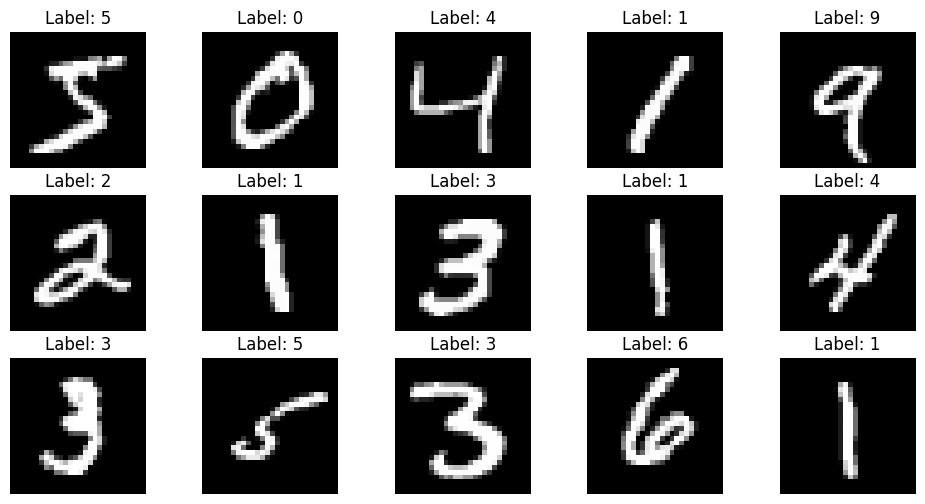

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

# plt.figure(figsize=(12, 6)) mengatur ukuran gambar keseluruhan.

# Loop for i in range(15) digunakan untuk menampilkan 15 gambar.

# plt.subplot(3, 5, i + 1) menentukan posisi gambar dalam grid 3x5.

# plt.imshow(X_train[i], cmap='gray') menampilkan gambar dalam skala abu-abu.

# plt.title(f"Label: {y_train[i]}") memberi judul pada gambar dengan menampilkan labelnya.

# plt.axis('off') menyembunyikan sumbu x dan y.

# plt.show() menampilkan gambar dalam grid yang sudah dibuat.

## 3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

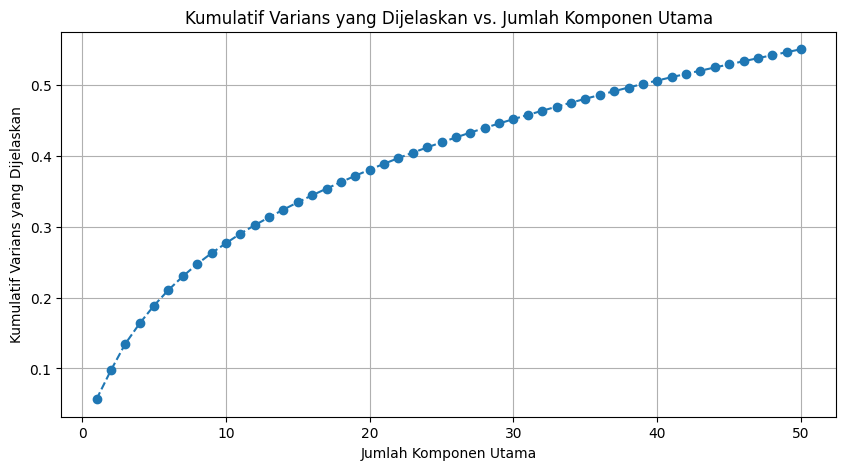

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load MNIST dataset using TensorFlow/Keras
mnist_dataset = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

# Reshape the data
data = X_train.reshape(X_train.shape[0], -1)

# Standardize the data (mean=0, variance=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

# Perform PCA with the desired number of components
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

# Display explained variance ratios
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()

# Menggunakan TensorFlow/Keras untuk memuat dataset MNIST.
# Merubah bentuk data untuk disiapkan agar bisa diolah oleh PCA.
# Standarisasi data agar memiliki rata-rata 0 dan varians 1.
# Melakukan PCA dengan jumlah komponen utama yang diinginkan (50 dalam kasus ini).
# Menampilkan grafik yang menunjukkan bagaimana kumulatif dari varians data dapat dijelaskan oleh jumlah komponen utama yang berbeda.


## 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [7]:
from sklearn.model_selection import train_test_split

# Daftar Ukuran Data Uji
test_sizes = [0.3, 0.2, 0.1]

# Inisialisasi daftar kosong untuk menyimpan pembagian data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Initialize y_train_list with the labels from the MNIST dataset
y_train_list.append(y_train)

# Pembagian data latih-uji untuk setiap ukuran data uji
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y_train_list[0], test_size=test_size)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Verifikasi bentuk (shapes) dari himpunan data latih dan uji untuk setiap pembagian (split)
for i, test_size in enumerate(test_sizes):
    print(f"Split {i + 1}:")
    print(f"X_train shape: {X_train_list[i].shape}")
    print(f"y_train shape: {y_train_list[i].shape}")
    print(f"X_test shape: {X_test_list[i].shape}")
    print(f"y_test shape: {y_test_list[i].shape}")
    print()

# Menggunakan train_test_split dari scikit-learn untuk membagi data latih dan data uji dari dataset MNIST yang sudah melalui proses PCA.

# test_sizes adalah daftar yang berisi berbagai ukuran yang akan digunakan untuk data uji (30%, 20%, dan 10% dari data).

# Daftar kosong X_train_list, X_test_list, y_train_list, dan y_test_list digunakan untuk menyimpan pembagian data latih
# dan data uji untuk setiap ukuran yang telah ditentukan.

# Menginisialisasi y_train_list dengan label dari dataset MNIST.

# Melakukan pembagian data latih dan data uji untuk setiap ukuran yang telah ditentukan menggunakan train_test_split,
# dan menyimpan hasilnya dalam daftar yang sesuai.

# Terakhir, melakukan verifikasi bentuk (shapes) dari setiap data latih dan data uji untuk setiap
# pembagian yang telah dilakukan dengan mencetak informasi tentang bentuk data tersebut.

Split 1:
X_train shape: (42000, 50)
y_train shape: (60000,)
X_test shape: (18000, 50)
y_test shape: (18000,)

Split 2:
X_train shape: (48000, 50)
y_train shape: (42000,)
X_test shape: (12000, 50)
y_test shape: (12000,)

Split 3:
X_train shape: (54000, 50)
y_train shape: (48000,)
X_test shape: (6000, 50)
y_test shape: (6000,)



## 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

## 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

### Klasifikasi menggunakan algoritma Naive Bayes

In [8]:
# 5. Klasifikasi menggunakan Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes dengan kernel Gaussian
naive_bayes_model = GaussianNB()

# Melatih model pada data pelatihan
naive_bayes_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_naive = naive_bayes_model.predict(X_test)

# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_naive)
classification_rep = classification_report(y_test, y_pred_naive)
confusion_mtx = confusion_matrix(y_test, y_pred_naive)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

# mengimpor modul yang diperlukan dari scikit-learn seperti GaussianNB untuk membuat model Naive Bayes,
# serta beberapa metrik evaluasi seperti accuracy_score, classification_report, dan confusion_matrix.

# Selanjutnya, kode menginisialisasi model Naive Bayes menggunakan GaussianNB().

# Model tersebut dilatih menggunakan data latih dengan menggunakan fit(X_train, y_train).

# Kemudian, dilakukan prediksi label pada data uji dengan menggunakan predict(X_test).

# Setelah mendapatkan prediksi, dilakukan evaluasi model dengan menghitung akurasi menggunakan accuracy_score,
# serta membuat laporan klasifikasi dengan classification_report dan matriks konfusi dengan confusion_matrix.

# Hasil evaluasi tersebut dicetak dalam bentuk persentase akurasi, laporan klasifikasi, dan matriks konfusi untuk mengevaluasi performa model klasifikasi Naive Bayes.

Akurasi: 72.20%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       589
           1       0.84      0.94      0.89       666
           2       0.60      0.58      0.59       616
           3       0.81      0.57      0.67       609
           4       0.71      0.81      0.76       592
           5       0.79      0.62      0.70       555
           6       0.92      0.74      0.82       608
           7       0.89      0.47      0.61       579
           8       0.51      0.81      0.62       584
           9       0.62      0.74      0.67       602

    accuracy                           0.72      6000
   macro avg       0.75      0.72      0.72      6000
weighted avg       0.75      0.72      0.72      6000

Matriks Konfusi:
 [[539   2  12   7   1   9   6   0  13   0]
 [  0 625   4   1   2   1   2   1  27   3]
 [ 26  14 356  32  30  11  16   3 119   9]
 [ 24  14  42 349   2  20   1   7 139  11]
 [  3  12  45

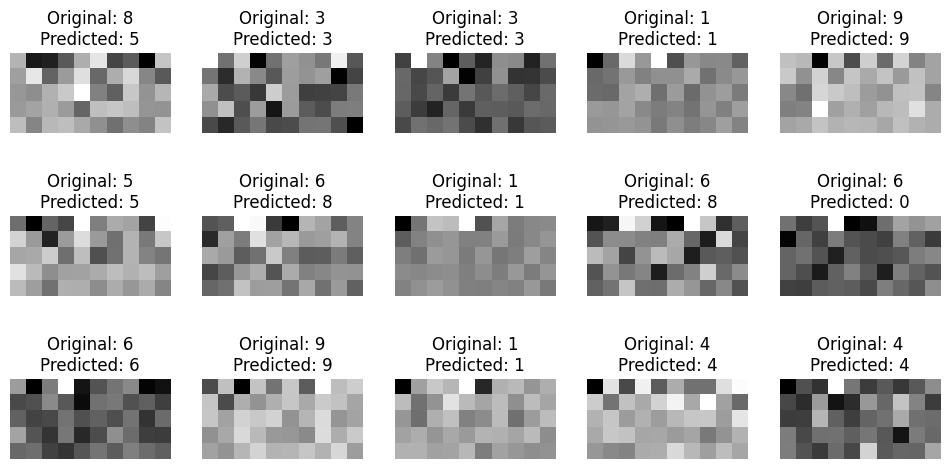

In [9]:
# 7. Menampilkan citra data testing beserta label prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_naive[i]}')
    plt.axis('off')

plt.show()

# Menggunakan Matplotlib untuk menampilkan 15 gambar dari data uji beserta label prediksi yang dihasilkan oleh model Naive Bayes.

# plt.figure(figsize=(12, 6)) mengatur ukuran gambar secara keseluruhan.

# Melalui loop for i in range(15), kode menyiapkan 15 subplot dalam bentuk grid 3x5.

# plt.subplot(3, 5, i + 1) menentukan posisi subplot dalam grid.

# plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
# menampilkan gambar dalam skala abu-abu setelah mengubah bentuknya menjadi 5x10 (asumsi gambar awalnya berbentuk 28x28 pixel).

# plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_naive[i]}') memberi judul pada
# subplot dengan menampilkan label asli (Original) dari dataset uji dan label yang diprediksi (Predicted) oleh model Naive Bayes.

# plt.axis('off') menyembunyikan sumbu x dan y pada gambar.

# plt.show() menampilkan grid dari gambar-gambar beserta label prediksi yang dihasilkan oleh model Naive Bayes.

### Klasifikasi menggunakan SVM dengan kernel RBF (Radial Basis Function)

In [10]:
# 5 Klasifikasi menggunakan RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_kernel = SVC(kernel='rbf')

# Melatih model SVM pada data uji
rbf_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_rbf = rbf_kernel.predict(X_test)

# 6. Evaluasi model
akurasi = accuracy_score(y_test, y_pred_rbf)
classification_rep = classification_report(y_test, y_pred_rbf)
confusion_mtx = confusion_matrix(y_test, y_pred_rbf)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matrix Konfusi:\n', confusion_mtx)

# Pertama, kode mengimpor modul yang diperlukan dari scikit-learn seperti SVC untuk
# membuat model SVM dengan kernel RBF, serta beberapa metrik evaluasi seperti accuracy_score, classification_report, dan confusion_matrix.

# Kemudian, kode menginisialisasi model SVM dengan kernel RBF menggunakan SVC(kernel='rbf').

# Model tersebut dilatih menggunakan data latih dengan menggunakan fit(X_train, y_train).

# Setelah itu, dilakukan prediksi label pada data uji dengan menggunakan predict(X_test).

# Dilakukan evaluasi model dengan menghitung akurasi menggunakan accuracy_score,
# membuat laporan klasifikasi dengan classification_report, dan matriks konfusi dengan confusion_matrix.

# Hasil evaluasi tersebut dicetak dalam bentuk persentase akurasi, laporan klasifikasi,
# dan matriks konfusi untuk mengevaluasi performa model klasifikasi SVM dengan kernel RBF.

Akurasi: 96.87%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       589
           1       0.98      0.99      0.99       666
           2       0.96      0.97      0.96       616
           3       0.97      0.95      0.96       609
           4       0.95      0.97      0.96       592
           5       0.98      0.97      0.97       555
           6       0.98      0.98      0.98       608
           7       0.95      0.97      0.96       579
           8       0.97      0.97      0.97       584
           9       0.96      0.95      0.95       602

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matrix Konfusi:
 [[576   2   3   0   1   1   5   0   1   0]
 [  0 657   2   2   0   0   0   4   0   1]
 [  1   2 595   6   5   0   2   3   1   1]
 [  1   1   6 580   0   4   0   7   8   2]
 [  0   1   5 

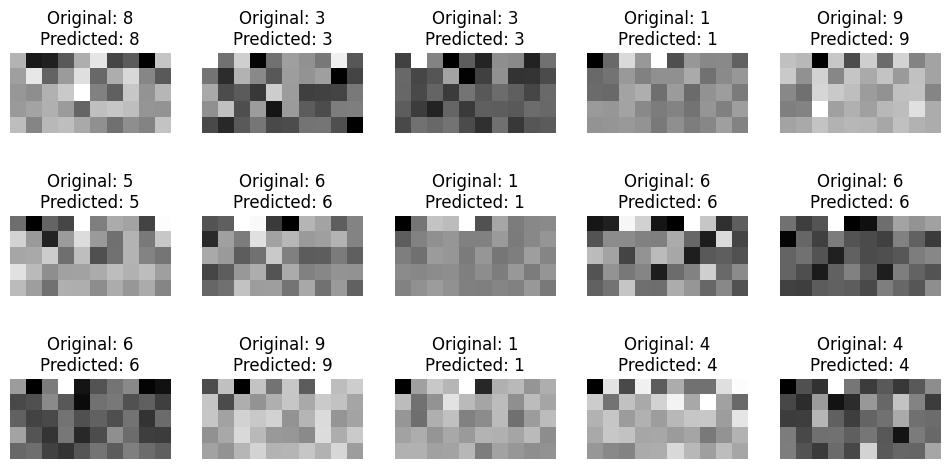

In [11]:
# 7. Menampilkan citra data testing berserta hasil pelabelannya

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_rbf[i]}')
    plt.axis('off')

plt.show()

# menggunakan Matplotlib untuk menampilkan 15 gambar dari data uji beserta label prediksi
# yang dihasilkan oleh model Support Vector Machine (SVM) dengan kernel RBF.

# plt.figure(figsize=(12, 6)) mengatur ukuran gambar secara keseluruhan.

# Melalui loop for i in range(15), kode menyiapkan 15 subplot dalam bentuk grid 3x5.

# plt.subplot(3, 5, i + 1) menentukan posisi subplot dalam grid.

# plt.imshow(X_test[i].reshape(5, 10), cmap='gray') menampilkan gambar dalam
# skala abu-abu setelah mengubah bentuknya menjadi 5x10 (asumsi gambar awalnya berbentuk 28x28 pixel).

# plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_rbf[i]}') memberi judul
# pada subplot dengan menampilkan label asli (Original) dari dataset uji dan label yang diprediksi (Predicted) oleh model SVM dengan kernel RBF.

# plt.axis('off') menyembunyikan sumbu x dan y pada gambar.

# plt.show() menampilkan grid dari gambar-gambar beserta label prediksi yang dihasilkan oleh model SVM dengan kernel RBF.

### Klasifikasi menggunakan SVM dengan kernel Polynomial

In [12]:
# 5 Klasifikasi menggunakan Polynomial Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

polynomial_kernel = SVC(kernel='poly', degree=3)

# Melatih model SVM pada data uji
polynomial_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_poly = polynomial_kernel.predict(X_test)

# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_poly)
classification_rep = classification_report(y_test, y_pred_poly)
confusion_mtx = confusion_matrix(y_test, y_pred_poly)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

# Pertama, kode mengimpor modul yang diperlukan dari scikit-learn seperti
# SVC untuk membuat model SVM dengan kernel polynomial, serta beberapa metrik evaluasi seperti
# accuracy_score, classification_report, dan confusion_matrix.

# Kemudian, kode menginisialisasi model SVM dengan kernel polynomial menggunakan
# SVC(kernel='poly', degree=3). Parameter degree=3 menunjukkan bahwa kita menggunakan kernel polynomial dengan derajat 3.

# Model tersebut dilatih menggunakan data latih dengan menggunakan fit(X_train, y_train).

# Setelah itu, dilakukan prediksi label pada data uji dengan menggunakan predict(X_test).

# Dilakukan evaluasi model dengan menghitung akurasi menggunakan accuracy_score,
# membuat laporan klasifikasi dengan classification_report, dan matriks konfusi dengan confusion_matrix.

# Hasil evaluasi tersebut dicetak dalam bentuk persentase akurasi, laporan klasifikasi,
# dan matriks konfusi untuk mengevaluasi performa model klasifikasi SVM dengan Polynomial Kernel.

Akurasi: 96.55%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       589
           1       0.98      0.98      0.98       666
           2       0.96      0.96      0.96       616
           3       0.97      0.94      0.96       609
           4       0.95      0.97      0.96       592
           5       0.98      0.96      0.97       555
           6       0.98      0.98      0.98       608
           7       0.96      0.96      0.96       579
           8       0.93      0.98      0.95       584
           9       0.95      0.95      0.95       602

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matriks Konfusi:
 [[570   0   4   1   1   1   4   1   6   1]
 [  0 656   2   3   0   0   0   2   1   2]
 [  1   2 593   4   5   0   0   2   8   1]
 [  1   2   7 574   0   4   0   6  14   1]
 [  0   1   3

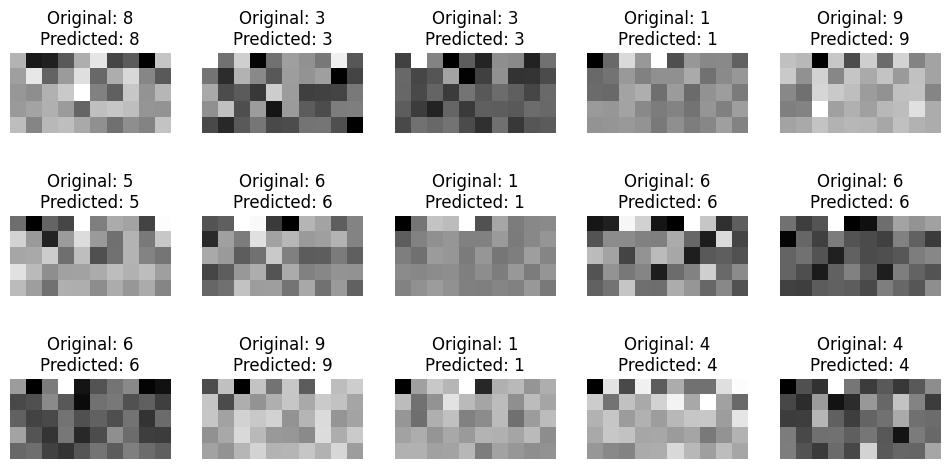

In [13]:
# 7. Menampilkan citra data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_poly[i]}')
    plt.axis('off')

plt.show()

# plt.figure(figsize=(12, 6)) mengatur ukuran gambar secara keseluruhan.

# Melalui loop for i in range(15), kode menyiapkan 15 subplot dalam bentuk grid 3x5.

# plt.subplot(3, 5, i + 1) menentukan posisi subplot dalam grid.

# plt.imshow(X_test[i].reshape(5, 10), cmap='gray') menampilkan
# gambar dalam skala abu-abu setelah mengubah bentuknya menjadi 5x10 (asumsi gambar awalnya berbentuk 28x28 pixel).

# plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_poly[i]}')
# memberi judul pada subplot dengan menampilkan label asli (Original)
# dari dataset uji dan label yang diprediksi (Predicted) oleh model SVM dengan Polynomial Kernel.

# plt.axis('off') menyembunyikan sumbu x dan y pada gambar.

# plt.show() menampilkan grid dari gambar-gambar bersama dengan label prediksi yang dihasilkan oleh model SVM dengan Polynomial Kernel.

### Klasifikasi menggunakan SVM dengan kernel Linear

In [14]:
# 5. Klasifikasi menggunakan Linear Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_kernel = SVC(kernel='linear')

# Melatih model SVM pada data uji
linear_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_linear = linear_kernel.predict(X_test)

# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_linear)
classification_rep = classification_report(y_test, y_pred_linear)
confusion_mtx = confusion_matrix(y_test, y_pred_linear)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

# Pertama, kode membuat model SVM dengan menggunakan kernel linear (garis lurus).

# Kemudian, model tersebut dilatih menggunakan data latih.

# Selanjutnya, dilakukan prediksi label untuk data uji.

# Terakhir, kode mengevaluasi performa model dengan menghitung akurasi prediksi, membuat laporan yang memperlihatkan seberapa baik model bekerja dalam memprediksi,
# serta memperlihatkan matriks konfusi yang memberikan gambaran tentang seberapa baik model dapat mengklasifikasikan data.

Akurasi: 92.83%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       589
           1       0.96      0.97      0.97       666
           2       0.90      0.94      0.92       616
           3       0.89      0.90      0.90       609
           4       0.92      0.94      0.93       592
           5       0.90      0.90      0.90       555
           6       0.95      0.96      0.96       608
           7       0.93      0.94      0.94       579
           8       0.92      0.88      0.90       584
           9       0.93      0.90      0.91       602

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Matriks Konfusi:
 [[563   1   5   5   0   5   3   4   2   1]
 [  0 649   2   4   1   1   0   3   4   2]
 [  2   3 577  10   5   1   5   3   7   3]
 [  1   2  17 546   0  18   2   9  11   3]
 [  1   0   5

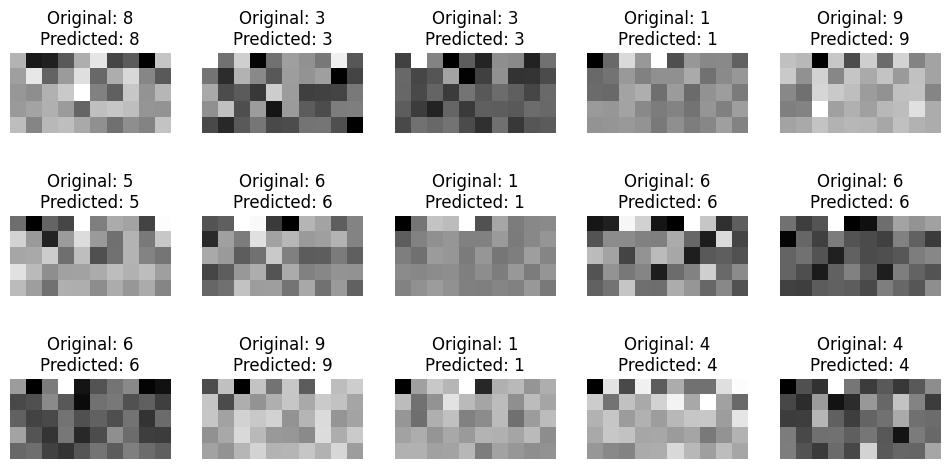

In [18]:
# 7. Menampilkan citra dari data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_linear[i]}')
    plt.axis('off')

plt.show()

# menggunakan Matplotlib untuk menampilkan 15 gambar dari data uji beserta label hasil prediksi yang dihasilkan oleh model Support Vector Machine (SVM) dengan Linear Kernel.

# plt.figure(figsize=(12, 6)) mengatur ukuran gambar secara keseluruhan.

# Melalui loop for i in range(15), kode menyiapkan 15 subplot dalam bentuk grid 3x5.

# plt.subplot(3, 5, i + 1) menentukan posisi subplot dalam grid.

# plt.imshow(X_test[i].reshape(5, 10), cmap='gray') menampilkan
# gambar dalam skala abu-abu setelah mengubah bentuknya menjadi 5x10 (asumsi gambar awalnya berbentuk 28x28 pixel).

# plt.title(f'Predicted: {y_pred_linear[i]}') memberi judul pada subplot dengan menampilkan label yang diprediksi (Predicted) oleh model SVM dengan Linear Kernel.

# plt.axis('off') menyembunyikan sumbu x dan y pada gambar.

# plt.show() menampilkan grid dari gambar-gambar berserta label prediksi yang dihasilkan oleh model SVM dengan Linear Kernel.

## 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Setelah melakukan percobaan dari dataset MNIST menggunakan algoritma Naive Bayes dan algoritma SVM dengan beberapa kernel seperti, RBF kernel, Polynomial kernel, dan Linear kernel. Bahwa untuk akurasi tertinggi menggunakan algoritma SVM dengan RBF kernel yang memiliki akurasi sebesar 96.80%. Dan yang terendah dengan menggunakan algoritma Naive Bayes yang memiliki akurasi sebesar 72.20%. Berikut adalah beberapa penjelasan mengenai penggunaan metode RBF kernel dalam beberapa faktor konfigurasi:

# 1. Kemampuan Kernel RBF untuk Menangani Data Non-Linearnya
Salah satu alasan utama kernel RBF bisa memiliki akurasi yang tinggi adalah kemampuannya dalam menangani data yang memiliki struktur non-linear. Dataset MNIST berisi gambar-gambar digit tulisan tangan, yang bisa memiliki variasi yang sangat tinggi dalam bentuk, ukuran, dan orientasi digit. Oleh karena itu, Kernel RBF ini memiliki fleksibilitas yang tinggi dalam menyesuaikan bentuk berbagai digit dengan baik.

# 2. Parameter Tuning yang Optimal:
Dalam penggunaan SVM, penting untuk menyesuaikan parameter-parameter seperti parameter C dan gamma. Parameter gamma pada kernel RBF mengontrol bentuk fungsi basis radial yang digunakan untuk mengukur jarak antara data. Dalam kasus MNIST, penggunaan parameter gamma yang sesuai dapat meningkatkan kemampuan model untuk menangani perbedaan antara
gambar-gambar digit karena biasanya pengaturan parameter ini dioptimalkan selama eksperimen.

# 3. Kemampuan Generalisasi:
Kernel RBF cenderung memiliki kemampuan generalisasi yang baik, berarti dapat menghasilkan model yang tidak hanya berkinerja baik pada data training tetapi juga pada data testing yang belum pernah dilihat sebelumnya. Hal ini dapat menghasilkan akurasi yang lebih tinggi pada pengujian dataset seperti MNIST.